# 第14章 教師なし学習1:次元の削減

# 14.1 次元削減の概要

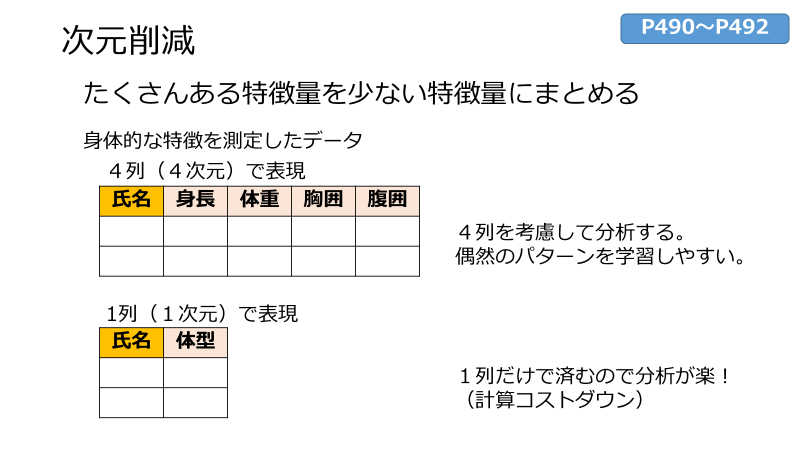

## 主成分分析

次元削減手法の１つ  
もとのデータの情報の損失ができるだけ小さくなる軸を探していく

（他に「潜在意味解析」、「線形判別分析」、「独立成分分析」など）


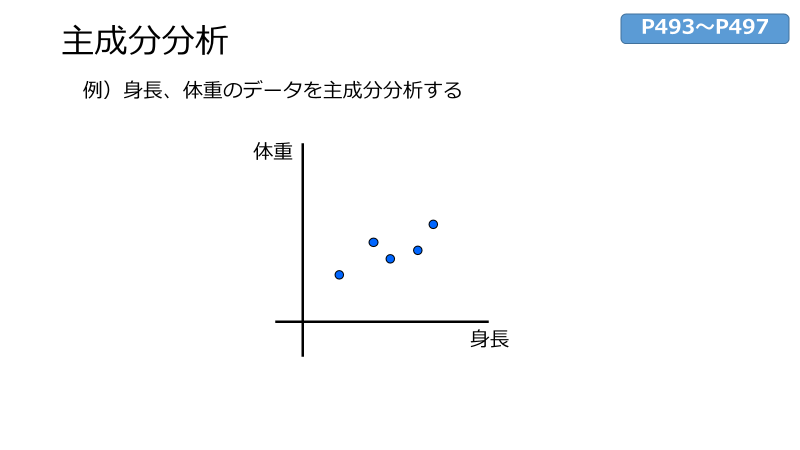

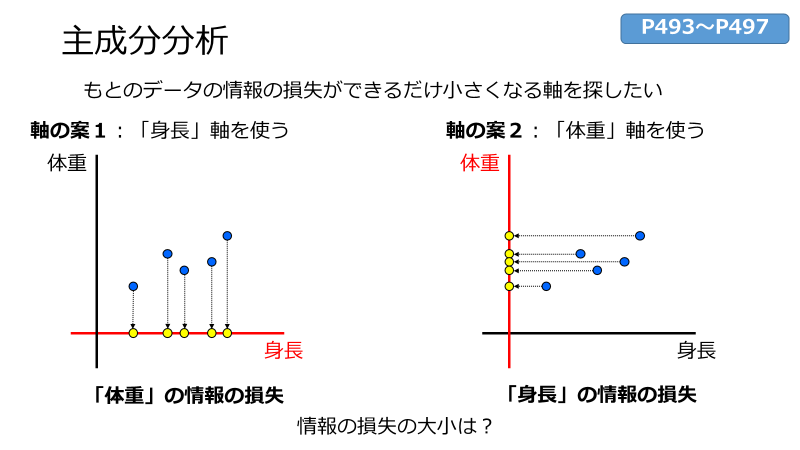

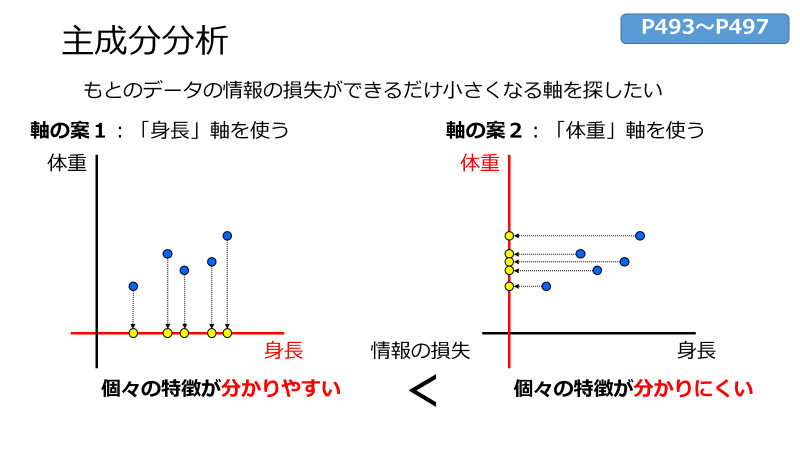

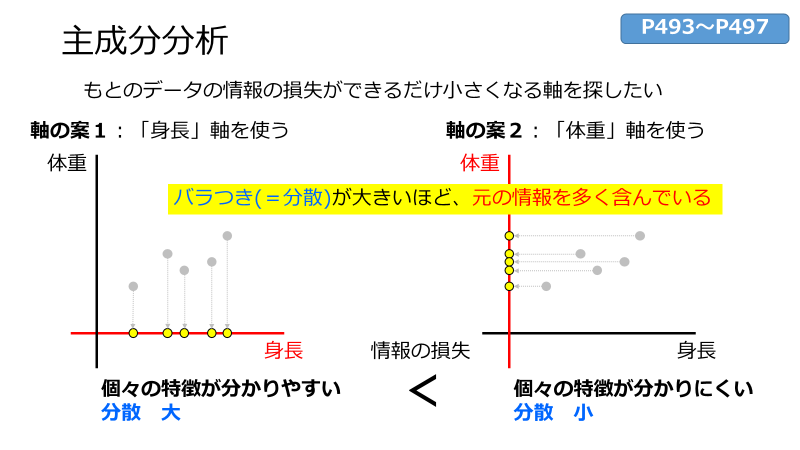

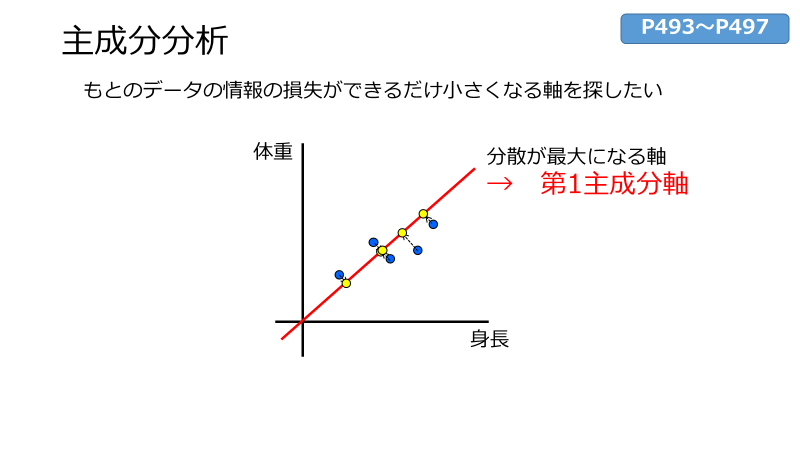

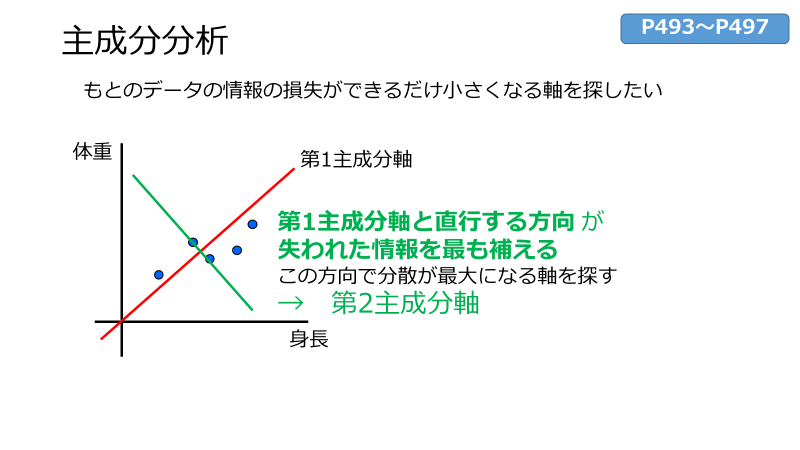

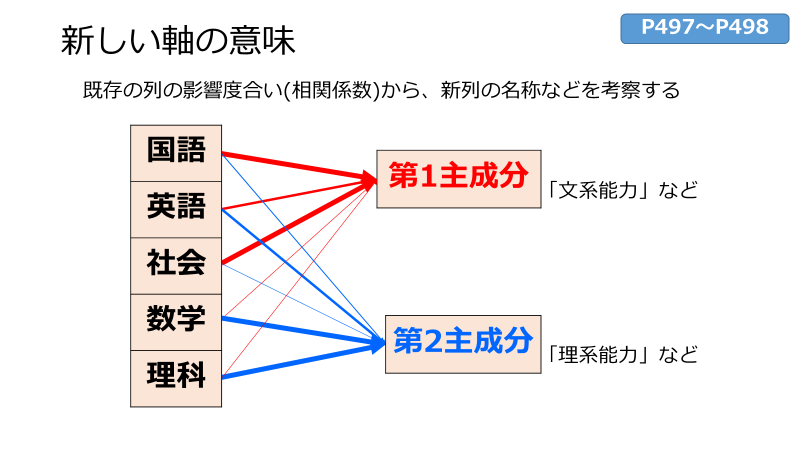

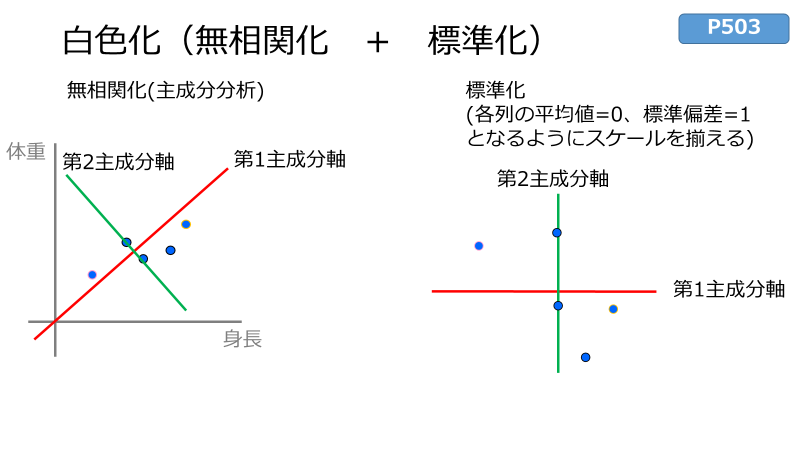

主成分分析(PCA:Principal Component Analysis)を使う  
**from sklearn.decomposition import PCA**

PCAモデルを作成する  
**PCA(n_components = ●, whiten = ▲)**
 * n_components ... 軸の数
 * whiten ... True:白色化を行う、False:白色化を行わない


PCAモデルにデータを学習させる  
**model.fit(データフレーム)**


軸の固有ベクトルを確認する  
**model.components_[軸のインデックス]**


元のデータを新しい軸に当てはめる(主成分得点を計算する)  
**new = model.transform(元のデータ)**


# 14.2 データの前処理

## データの読み込み

コード14-1 Boston.csvを読み込み先頭2行を表示(P499)

In [ ]:
import pandas as pd
df = pd.read_csv('Boston.csv') # csvの読み込み
df.head(2) # 先頭2行の表示

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


穴埋めコード1 次元削減前の行数列数を確認しておく

In [ ]:
# dfの行数列数を表示する
df.shape

(100, 14)

▶実行結果  
(100, 14)

## 欠損値の確認

コード14-2 平均値で欠損値を穴埋めする(P500)

In [ ]:
# 列ごとの平均値で欠損値の穴埋め
df2 = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## ダミー変数化

コード14-3 CRIME列のダミー変数化(P500)

In [ ]:
dummy = pd.get_dummies( df2['CRIME'], drop_first = True )

# df2とdummyを列方向に結合し、df3に代入する
df3 = df2.join(dummy)

# df3から元のCRIMEを削除し、df3に入れる
df3 = df3.drop(['CRIME'], axis = 1) 

df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


▶実行結果  
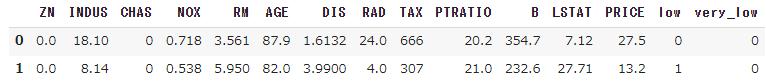

## データの標準化

コード14-4 データの標準化(P501)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 中身が整数だと、fit_transformで警告になるので、float型に変換（省略可能）
df4 = df3.astype('float')

# スケーラーの作成
sc = StandardScaler()

# df4の情報抽出と標準化を一気に行う
sc_df = sc.fit_transform(df4)

# 14.3 主成分分析の実施

コード14-5 モジュールのインポート(P502)

In [ ]:
from sklearn.decomposition import PCA

コード14-6 モデルの作成(P502)

In [ ]:
# モデル作成（2軸にする。白色化する。）
model = PCA(n_components = 2, whiten = True)
# model = __空欄__

コード14-7 モデルに学習を指せる(P504)

In [ ]:
# 標準化されたデータsc_dfを、モデルに学習させる
model.fit(sc_df)

PCA(n_components=2, whiten=True)

コード14-8 第1軸と第2軸の固有ベクトル(P504)

In [ ]:
# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print( model.components_[0])
print('-----')
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print( model.components_[1])

[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126]
-----
[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


▶実行結果  
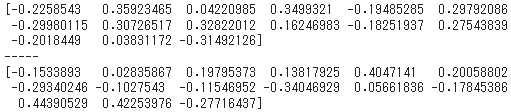

コード14-9 既存のsc_dfを新しい2つの軸に当てはめる(P505)

In [ ]:
# 標準化されたデータsc_dfを、モデルで変換する
new = model.transform(sc_df)

# 変換したデータはndarray型なので、データフレームにする
new_df = pd.DataFrame(new)
new_df.head(3)

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175


# 14.4 結果の評価

## 主成分負荷量

新しい軸が、本の軸のどの情報からなりたっているかを確認する  
　→　元の列 と 新しい軸 の**相関係数**で判断

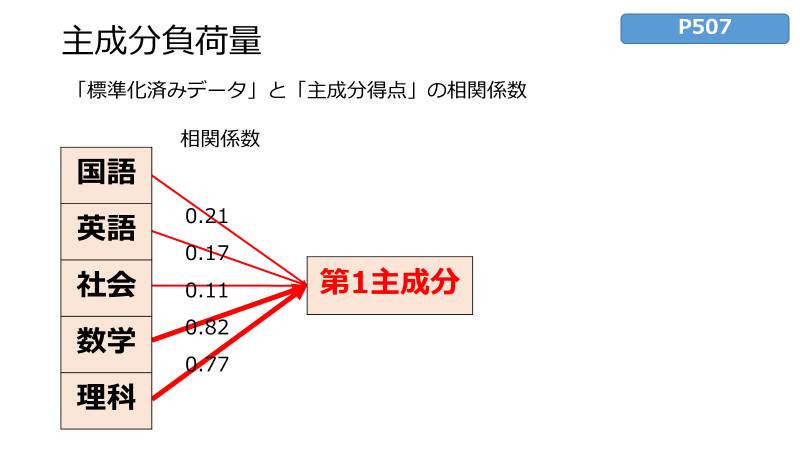

コード14-10 新しい2列ともとの列を結合(P508)

In [ ]:
# 新しいデータの軸に一旦名前をつける
new_df.columns = ['PC1', 'PC2']

# 元のデータと新しいデータの相関係数を求めるため、両方を結合したデータフレームにする
# （corrで簡単に相関係数を求められるようになる）

# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns = df4.columns)

# 上記のデータフレームと新しいデータの、2つのデータフレームを列方向に結合する
df6 = pd.concat( [df5, new_df], axis=1 )

コード14-11 主成分負荷量の計算(P508)

In [ ]:
# 相関係数の計算
df_corr = df6.corr()
df_corr

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low,PC1,PC2
ZN,1.000000,-0.413801,-0.020551,-0.459063,0.172917,-0.484837,0.593037,-0.254450,-0.257640,-0.262523,0.145139,-0.337898,0.193146,-0.202371,0.409133,-5.608021e-01,-2.260973e-01
INDUS,-0.413801,1.000000,0.157138,0.802464,-0.421951,0.620097,-0.676479,0.650419,0.743518,0.282389,-0.324724,0.562670,-0.396040,0.063395,-0.693969,8.919890e-01,4.180095e-02
CHAS,-0.020551,0.157138,1.000000,0.129360,0.072048,0.096141,-0.118997,0.095892,0.103137,-0.030505,0.017520,-0.061717,0.114753,0.079472,-0.137649,1.048082e-01,2.917857e-01
NOX,-0.459063,0.802464,0.129360,1.000000,-0.297557,0.682188,-0.755101,0.622817,0.690715,0.099131,-0.371033,0.506199,-0.286387,0.063427,-0.701661,8.688905e-01,2.036776e-01
RM,0.172917,-0.421951,0.072048,-0.297557,1.000000,-0.201136,0.095502,-0.277106,-0.354765,-0.363856,0.099481,-0.560947,0.686674,0.134248,0.188623,-4.838247e-01,5.965525e-01
AGE,-0.484837,0.620097,0.096141,0.682188,-0.201136,1.000000,-0.696931,0.401993,0.441867,0.147185,-0.231157,0.471668,-0.261573,0.226705,-0.602254,7.397452e-01,2.956687e-01
DIS,0.593037,-0.676479,-0.118997,-0.755101,0.095502,-0.696931,1.000000,-0.470486,-0.499881,-0.083598,0.237879,-0.380318,0.036360,-0.160125,0.610582,-7.444141e-01,-4.324781e-01
RAD,-0.254450,0.650419,0.095892,0.622817,-0.277106,0.401993,-0.470486,1.000000,0.944359,0.441135,-0.377976,0.317398,-0.245235,-0.243074,-0.574758,7.629474e-01,-1.514608e-01
TAX,-0.257640,0.743518,0.103137,0.690715,-0.354765,0.441867,-0.499881,0.944359,1.000000,0.409159,-0.383749,0.367904,-0.333706,-0.227436,-0.593016,8.149791e-01,-1.702032e-01
PTRATIO,-0.262523,0.282389,-0.030505,0.099131,-0.363856,0.147185,-0.083598,0.441135,0.409159,1.000000,-0.156204,0.262200,-0.453794,-0.129344,-0.152630,4.034168e-01,-5.018551e-01


In [ ]:
# 見たいのは PC1列、PC2列 と 元の列 の相関係数の部分だけなので、loc機能で抜き出す
df_corr.loc[ :'very_low', 'PC1': ]

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


コード14-12 相関係数を大きい順に並べ替える(P509)

In [ ]:
# わかりやすいように変数に代入
pc_corr = df_corr.loc[ :'very_low', 'PC1': ]

# 抜き出した部分のPC1列の部分を降順に並べる
pc_corr['PC1'].sort_values( ascending = False )

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

* INDUS ... (正の相関)小売業以外の商業が占める面積の割合
* NOX ... (正の相関)窒素化合物
* TAX ... (正の相関)10,000ドルあたりの不動産税率
* RAD ... (正の相関)高速道路へのアクセスのしやすさ
* AGE ... (正の相関)古い住居の割合
* DIS ... (負の相関)雇用施設との距離


コード14-13 第2列の相関を確認(P511)

In [ ]:
# 抜き出した部分のPC2列の部分を降順に並べる
pc_corr['PC2'].sort_values(ascending = False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

* PRICE ... (正の相関)平均家賃
* low ... (正の相関)犯罪発生率が低い
* RM ... (正の相関)平均部屋数

コード14-14 新しい列の散布図(P513)

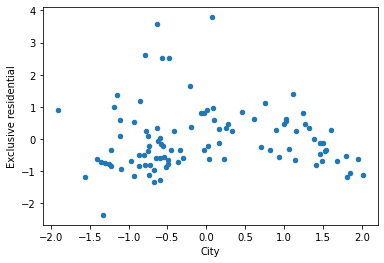

In [ ]:
# 新しいデータの軸は「都市の発展度合い」と「住環境の良さ」
col = ['City', 'Exclusive residential']

# 新しいデータの列名の変更
new_df.columns = col

# 2軸まで減らせたため、散布図などのグラフ化も可能
new_df.plot(kind = 'scatter', x = 'City', y = 'Exclusive residential')

## 最適な列の個数 －寄与率－

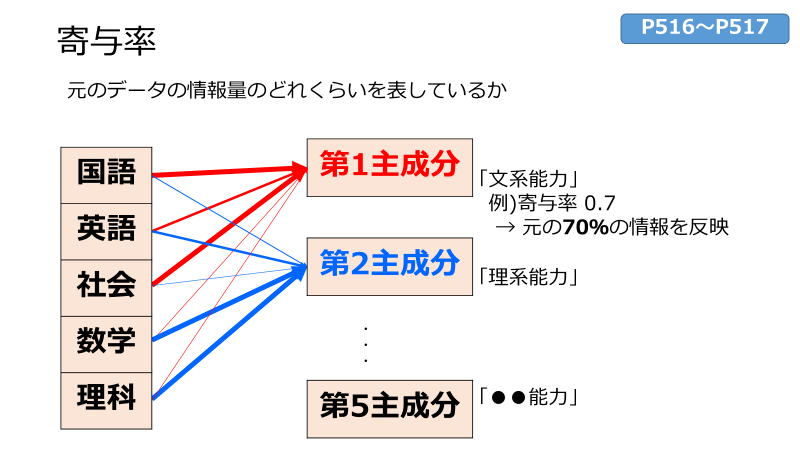

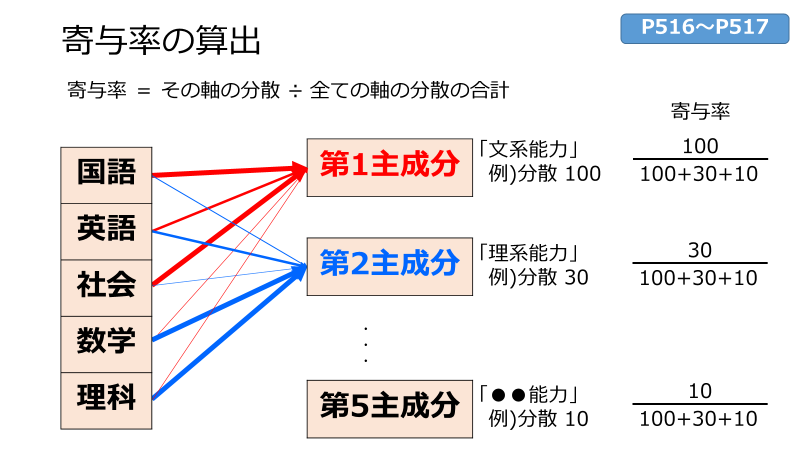

寄与率を計算する  
**model.explained_variance_ratio_**

コード14-15 新規の軸を全て用意する(P515)

In [ ]:
model = PCA(whiten = True)

# 学習と新規軸へのデータの当てはめを一括で行う
tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

コード14-16 寄与率を表示する(P517)

In [ ]:
model.explained_variance_ratio_

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

▶実行結果  
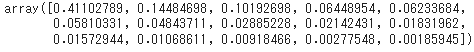

コード14-17 累積寄与率(P518)

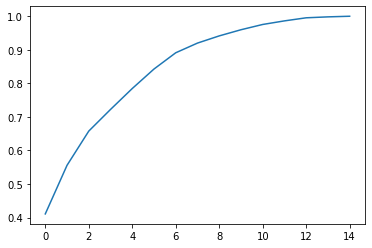

In [ ]:
ratio = model.explained_variance_ratio_ # 寄与率のデータ集合

array = [] # 第N列までの累積寄与率を格納するリスト
for i in range( len(ratio) ):
# 累積寄与率の計算
    ruiseki = sum(ratio[ 0:(i+1) ])
    array.append(ruiseki) # 累積寄与率の格納

# 第N列の累積寄与率を折れ線グラフ化
pd.Series(array).plot(kind = 'line')

コード14-18 情報量のしきい値を設定して必要な列の数を求める(P519)

In [ ]:
thred = 0.8 # 累積寄与率のしきい値
for i in range(len(array)):
 # 第(i + 1)列の累積寄与率がthredより大きいかチェック
    if array[i] >= thred:
        print(i + 1)
        break

6


コード14-19 新規の列を6つに設定してモデルに学習させる(P519)

In [ ]:
model = PCA(n_components=6, whiten = True)

model.fit (sc_df) # 学習

# 元データを新規の列（6列）に当てはめる
new = model.transform(sc_df)

## データフレームをCSVファイルに保存する

データフレームをCSVに保存する  
df**.to_csv(ファイル名, index=●)**

index ... True:csvファイルにindexを付ける、False:csvファイルにindexを付けない

コード14-20 6列のデータをCSVファイルに保存(P520)

In [ ]:
# 主成分分析の結果をデータフレームに変換
col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
new_df2 = pd.DataFrame(new, columns = col)

# データフレームをcsvファイルとして保存
new_df2.to_csv('boston_pca.csv', index = False)